# 使用lubridate处理日期和时间

日期和时间说简单也简单，因为我们用不着太多，说复杂也很复杂，就不展开了。

本章主要讨论lubridate包，它可以使得R对日期和时间的处理更加容易。

In [1]:
library(tidyverse)
library(lubridate)
library(nycflights13)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
# 获取当前日期时间
today()
now()

[1] "2019-12-13"

[1] "2019-12-13 00:51:14 CST"

## 通过字符串创建日期或时间

In [3]:
# 通过y、m和d的顺序解析日期
ymd("2019-12-12")
mdy("January 31st, 2019")
dmy("31-Jan-2019")
ymd("2019/12/12")# 斜杠和连字符都可以
dmy(12122019)# 不带引号也可以

[1] "2019-12-12"

[1] "2019-01-31"

[1] "2019-01-31"

[1] "2019-12-12"

[1] "2019-12-12"

In [4]:
# 同理，时间用h、m和s
ymd_hms("2019-12-12 0:27:12")
ymd_hm("20191212 00:28")
hms("01:28:21")

# 通过添加一个时区参数，你可以将一个日期强制转换为日期时间：
ymd(20190131, tz ="UTC") 

[1] "2019-12-12 00:27:12 UTC"

[1] "2019-12-12 00:28:00 UTC"

[1] "1H 28M 21S"

[1] "2019-01-31 UTC"

## 通过各个成分创建

In [5]:
# flights表格中的日期时间数据
flights %>% select(year, month, day, hour, minute) %>% head()

year,month,day,hour,minute
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,5,15
2013,1,1,5,29
2013,1,1,5,40
2013,1,1,5,45
2013,1,1,6,0
2013,1,1,5,58


In [6]:
# 使用make_date()函数创建日期，使用make_datetime()函数创建日期时间
flights %>% select(year, month, day, hour, minute) %>% 
mutate(departure = make_datetime(year, month, day, hour, minute)) %>% 
head()

year,month,day,hour,minute,departure
<int>,<int>,<int>,<dbl>,<dbl>,<dttm>
2013,1,1,5,15,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:40:00
2013,1,1,5,45,2013-01-01 05:45:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,5,58,2013-01-01 05:58:00


In [7]:
# flights数据中４个时间列表示时间的方法有点奇怪，需要处理一下
head(flights) %>% select(ends_with("delay"),ends_with("time"))
# 构造分离小时与分钟函数
make_datetime_100 <- function(year, month, day, time){
    make_datetime(year, month, day, time %/% 100, time %% 100)
}

dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
2,11,517,515,830,819,227
4,20,533,529,850,830,227
2,33,542,540,923,850,160
-1,-18,544,545,1004,1022,183
-6,-25,554,600,812,837,116
-4,12,554,558,740,728,150


In [8]:
flights_dt <- flights %>% filter(!is.na(dep_time), !is.na(arr_time)) %>% 
mutate(dep_time = make_datetime_100(year, month, day, dep_time),
      arr_time = make_datetime_100(year, month, day, arr_time),
      sched_dep_time = make_datetime_100(year, month, day, sched_arr_time),
      sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)) %>% 
select(origin, dest, ends_with("delay"), ends_with("time"))

flights_dt %>% head()

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 08:19:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 10:22:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 08:37:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 07:28:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150


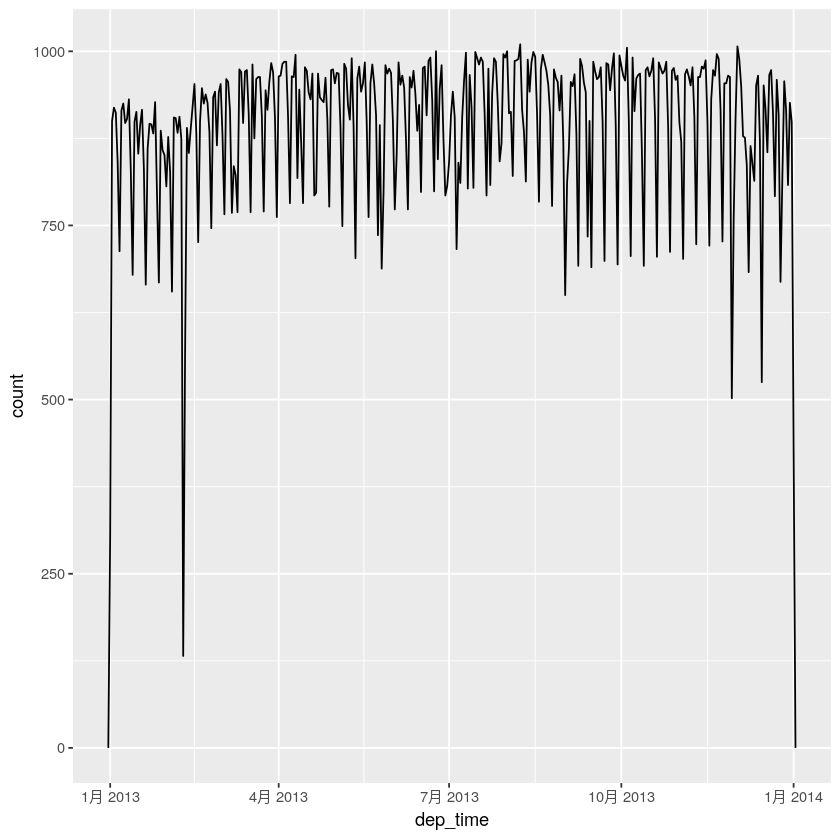

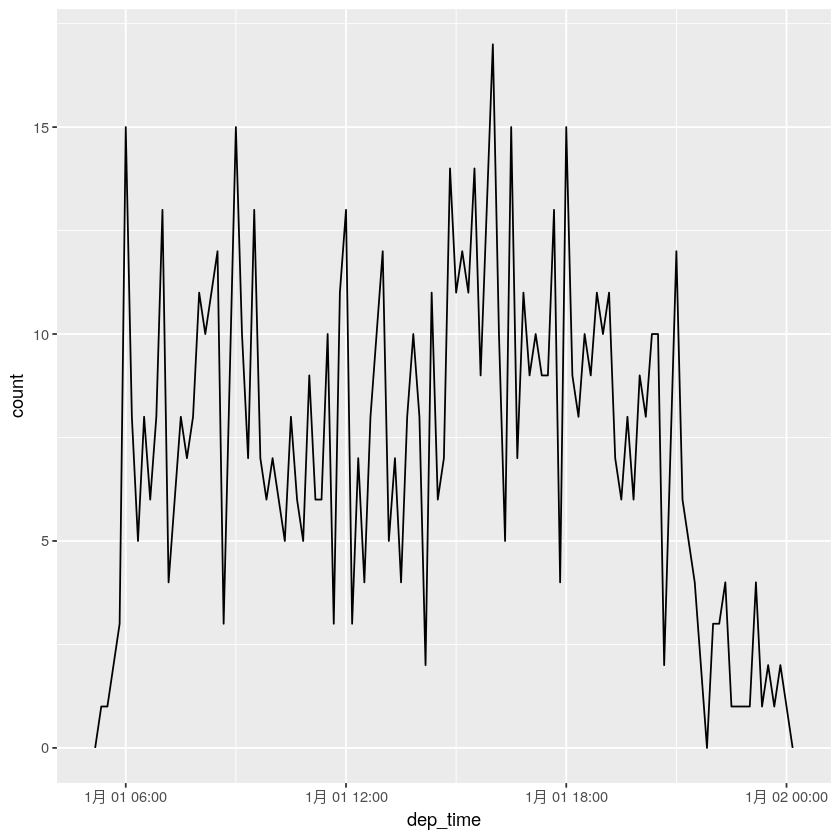

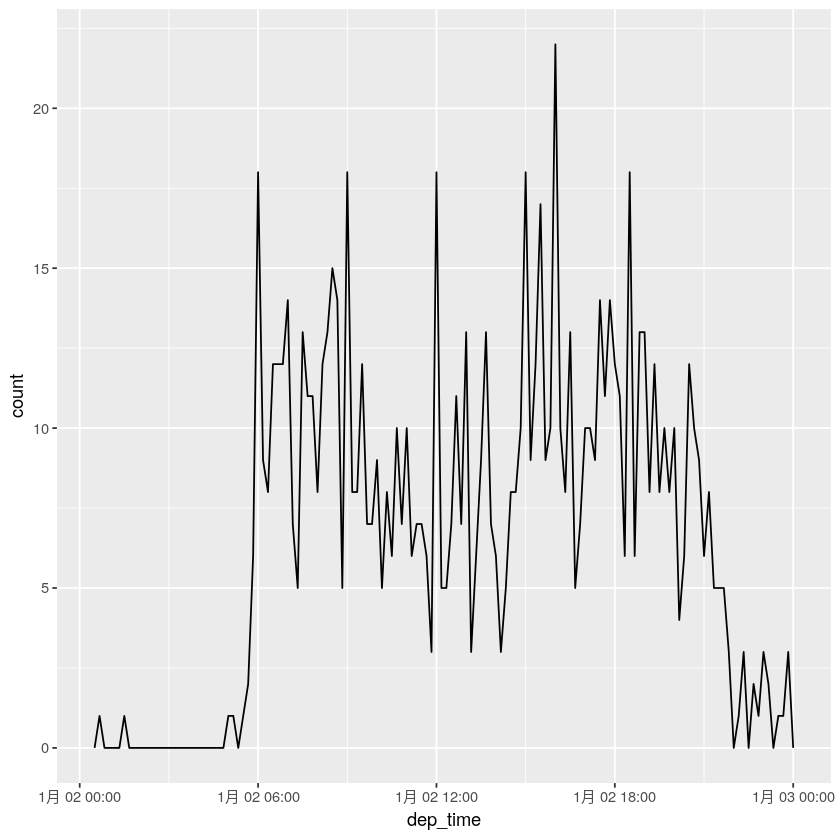

In [9]:
# 一年间出发时间可视化
flights_dt %>% ggplot(aes(dep_time)) +
geom_freqpoly(binwidth = 86400)

# 某天的分布
flights_dt %>% filter(dep_time < ymd(20130102)) %>% 
ggplot(aes(dep_time)) + geom_freqpoly(binwidth = 600)

flights_dt %>% filter(dep_time > ymd(20130102) & dep_time < ymd(20130103)) %>% 
ggplot(aes(dep_time)) + geom_freqpoly(binwidth = 600)

In [10]:
# 通过其他类型数据创建
# 使用as_datetime()函数和as_date()函数转换
as_datetime(today())
as_date(now())

[1] "2019-12-13 UTC"

[1] "2019-12-13"

练习就不说了，很简单。

# 日期时间成分

In [11]:
# 提取出日期中的独立成分
datetime <- ymd_hms("2019-12-12 23:30:32")

year(datetime)
month(datetime)
mday(datetime)
yday(datetime)
wday(datetime)# 一周的第几天和我们的不一样
wday(datetime, abbr = F, label = T)

[1] 2019

[1] 12

[1] 12

[1] 346

[1] 5

[1] 星期四
Levels: 星期日 < 星期一 < 星期二 < 星期三 < 星期四 < 星期五 < 星期六

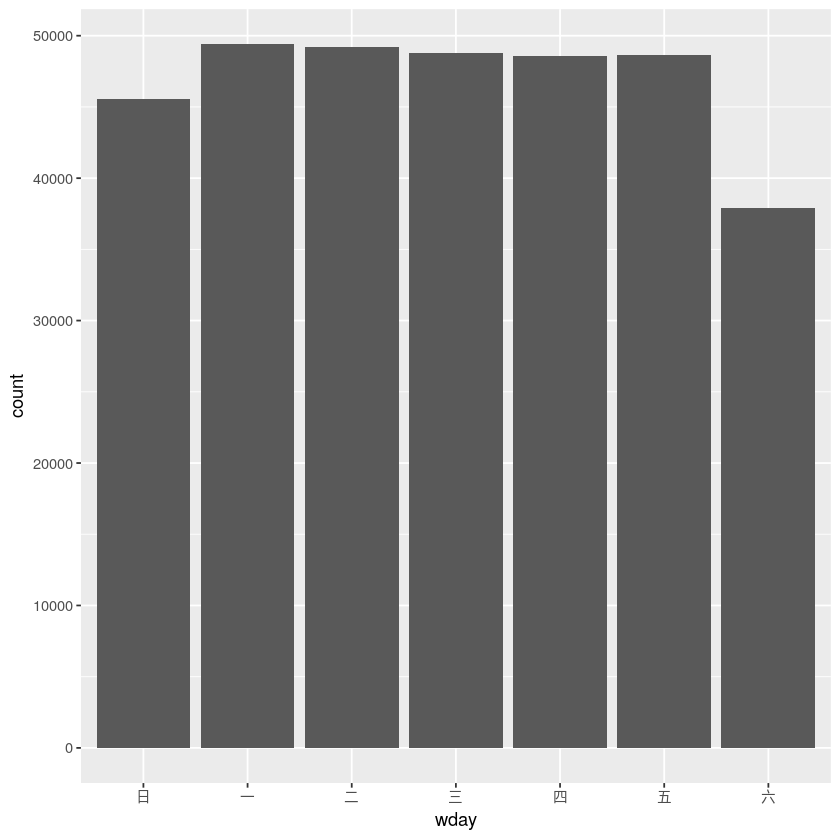

In [12]:
# 工作日出发的航班是否多于周末出发的航班？
flights_dt %>% mutate(wday = wday(dep_time, label = T)) %>% 
ggplot(aes(x = wday)) + geom_bar()

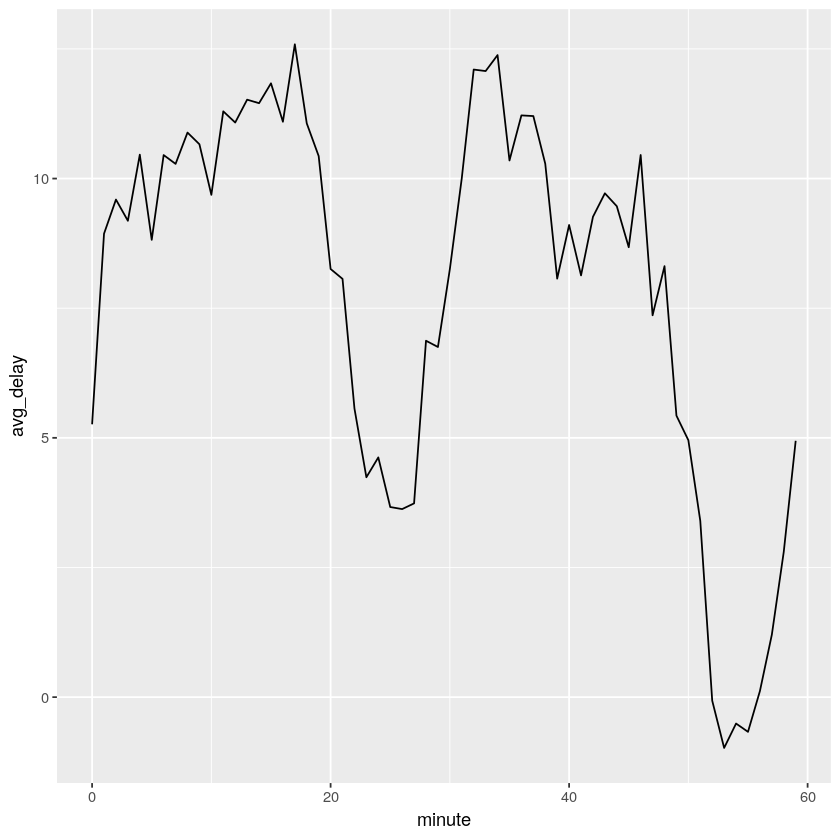

In [13]:
# 查看一小时内每分钟的平均出发延误
flights_dt %>% mutate(minute = minute(dep_time)) %>% 
group_by(minute) %>% 
summarise(avg_delay = mean(arr_delay, na.rm = T),n = n()) %>%
ggplot(aes(minute, avg_delay)) + geom_line()

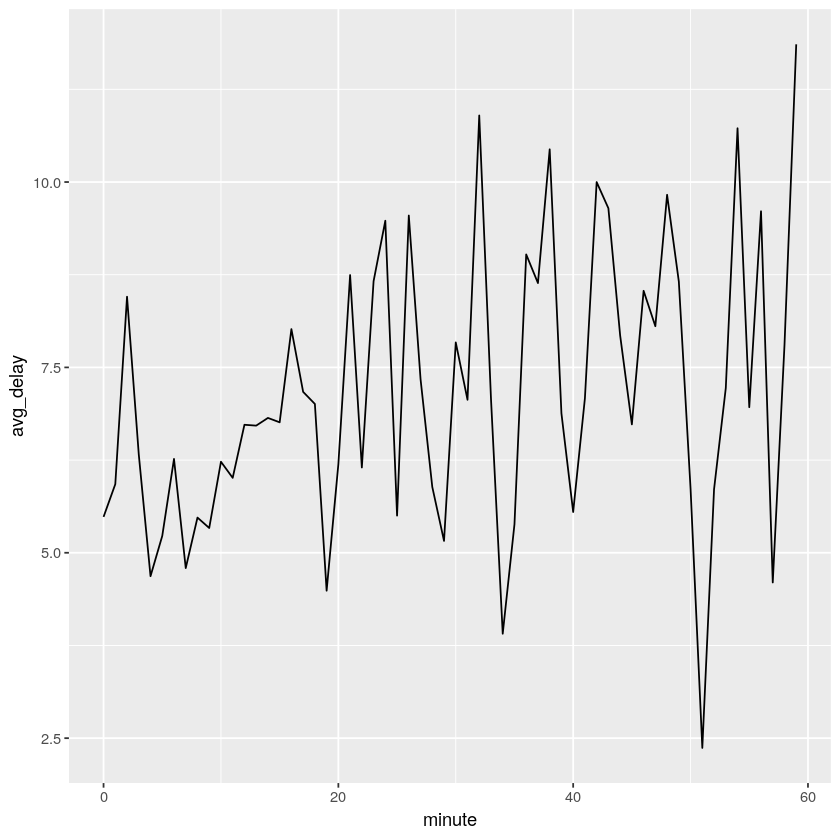

In [14]:
# 检查计划出发时间
sched_dep <- flights_dt %>% mutate(minute = minute(sched_dep_time)) %>% 
group_by(minute) %>% 
summarise(avg_delay = mean(arr_delay, na.rm = T), n = n())

ggplot(sched_dep, aes(minute, avg_delay)) + geom_line()

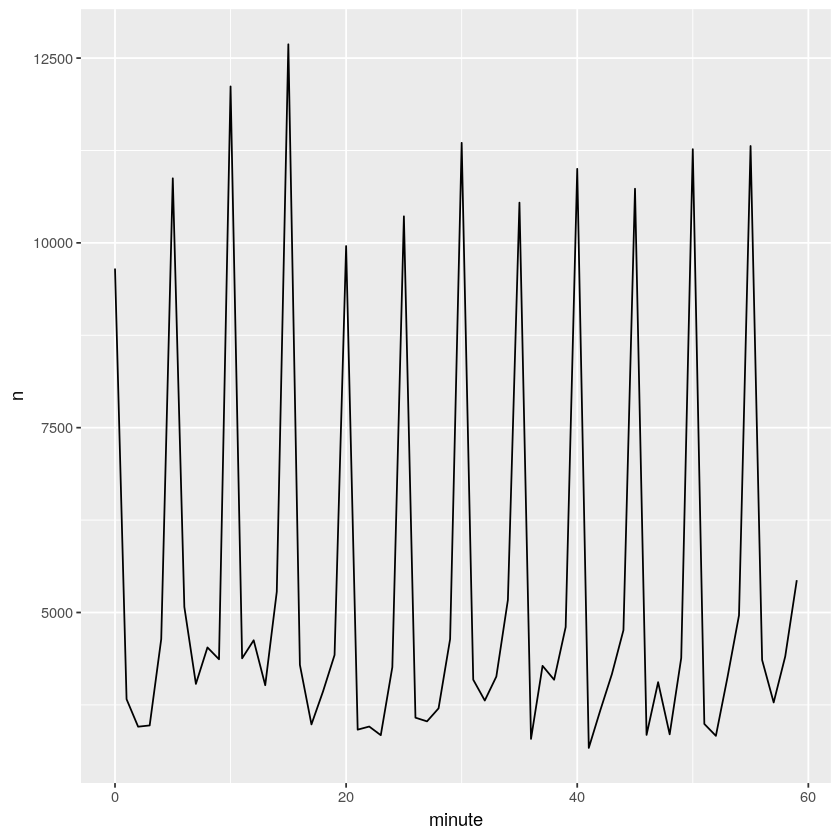

In [15]:
ggplot(sched_dep, aes(minute, n)) + geom_line()

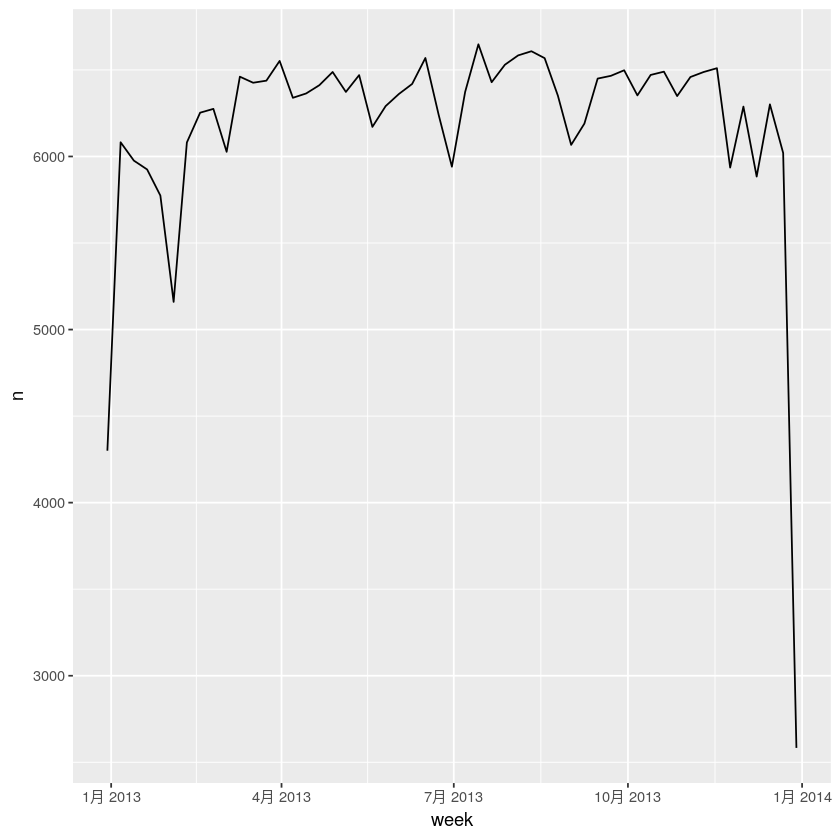

In [16]:
# floor_date()、round_date()和ceiling_date()函数将日期舍入到临近的一个时间单位。
# 函数会将这个向量舍下、入上或四舍五入到这个时间单位

# 绘制出每周的航班数量
flights_dt %>% count(week = floor_date(dep_time, "week")) %>% 
ggplot(aes(week, n)) + geom_line()

In [17]:
# 通过year()，month()，day()函数等可以设置日期时间中的成分
datetime <- ymd_hms("2019-12-12 23:30:32")
datetime
year(datetime) <- 2020
datetime
# 其他类似函数就不演示了
hour(datetime) <- hour(datetime) + 1
datetime

[1] "2019-12-12 23:30:32 UTC"

[1] "2020-12-12 23:30:32 UTC"

[1] "2020-12-13 00:30:32 UTC"

In [18]:
# 也可以同时设置多个成分
update(datetime, year =2020, month =2, mday =2, hour =2) 
# 如果设置的值过大，那么可以自动向后滚动
ymd("2015-02-01") %>% update(mday =30)

[1] "2020-02-02 02:30:32 UTC"

[1] "2015-03-02"

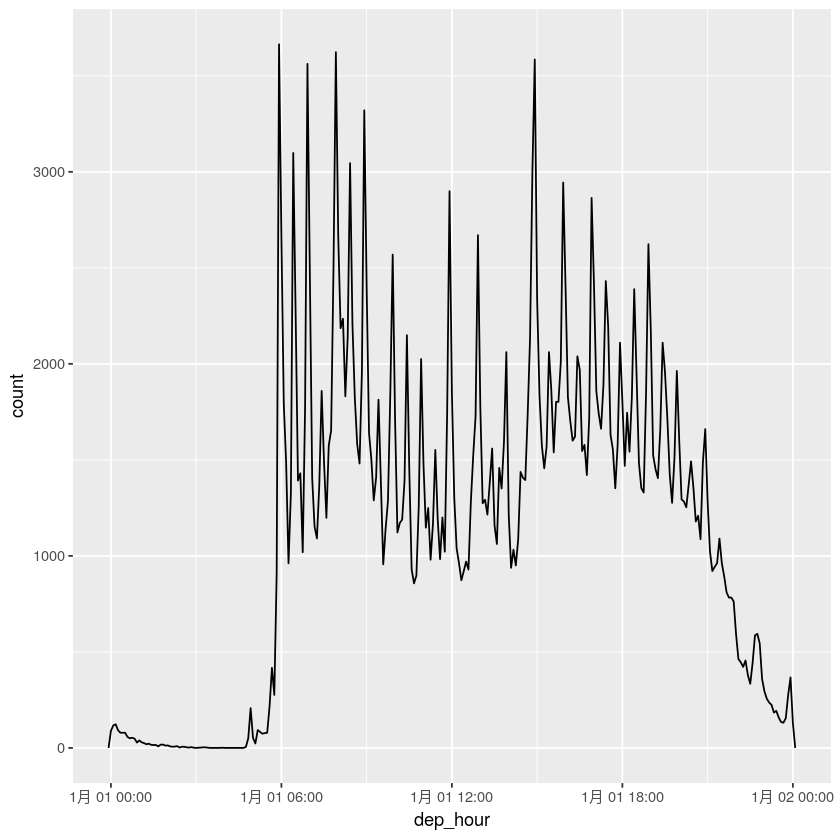

In [19]:
# 一年中所有航班的出发时间在一天内的分布
flights_dt %>% mutate(dep_hour = update(dep_time, yday = 1)) %>%
ggplot(aes(dep_hour)) + 
geom_freqpoly(binwidth = 300)
# 可以明显看到还是白天出发的多

## 时间间隔

### 时期

In [20]:
 today() - ymd(20181213)# 和书上不一样啊

Time difference of 365 days

In [21]:
# 我们看lubridate提供的总是使用秒为单位的另一种计时对象——时期
as.duration(today() - ymd(20181213))

[1] "31536000s (~52.14 weeks)"

In [22]:
dseconds(15)
dminutes(10)
dhours(c(2,5))
# 同样的，其他几个就不示范了

[1] "15s"

[1] "600s (~10 minutes)"

[1] "7200s (~2 hours)"  "18000s (~5 hours)"

In [23]:
# 由于时期总是以秒为单位来记录时间间隔，可以方便的运算
2*dyears(1)
dyears(1) + dweeks(3) + dhours(5)
# 至于因为夏时制出现的问题暂不讨论

[1] "63072000s (~2 years)"

[1] "33368400s (~1.06 years)"

### 阶段

阶段也是一种时间间隔，但它不以秒为单位；相反，它使用“人工”时间，比如日和月


In [24]:
seconds(12)
minutes(45)
weeks(3)

# 可以对阶段进行加法和乘法操作
10* (months(6) +days(1)) 
# 其他看书吧，暂时不讨论

[1] "12S"

[1] "45M 0S"

[1] "21d 0H 0M 0S"

[1] "60m 10d 0H 0M 0S"

### 区间

区间是带有起点的时期，这使得其非常精确，你可以确切地知道它的长度

In [25]:
next_year <-today() + years(1) 
(today() %--% next_year) /ddays(1)

[1] 366

### 时区

时区用到再来看，目前自己用不着